In [1]:
import warnings
warnings.filterwarnings('ignore')
import netCDF4 as nc
import numpy as np
import xarray as xr

In [2]:
fn = 'test.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

In [3]:
time = ds.createDimension('time', None)
lat = ds.createDimension('lat', 10)
lon = ds.createDimension('lon', 10)

In [4]:
times = ds.createVariable('time', 'f4', ('time',))
lats = ds.createVariable('lat', 'f4', ('lat',))
lons = ds.createVariable('lon', 'f4', ('lon',))
value = ds.createVariable('value', 'f4', ('time', 'lat', 'lon',))
value.units = 'Unknown'

In [5]:
lats[:] = np.arange(40.0, 50.0, 1.0)
lons[:] = np.arange(-110.0, -100.0, 1.0)

In [6]:
print('var size before adding data', value.shape)

var size before adding data (0, 10, 10)


In [7]:
value[0, :, :] = np.random.uniform(0, 100, size=(10, 10))

In [8]:
print('var size after adding first data', value.shape)
xval = np.linspace(0.5, 5.0, 10)
yval = np.linspace(0.5, 5.0, 10)
value[1, :, :] = np.array(xval.reshape(-1, 1) + yval)

var size after adding first data (1, 10, 10)


In [9]:
print('var size after adding second data', value.shape)

var size after adding second data (2, 10, 10)


In [10]:
ds.close()

In [11]:
ds_read = xr.open_dataset("test.nc", engine="netcdf4")

In [12]:
ds_read

<xarray.Dataset>
Dimensions:  (time: 2, lat: 10, lon: 10)
Coordinates:
  * time     (time) float32 9.969e+36 9.969e+36
  * lat      (lat) float32 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0
  * lon      (lon) float32 -110.0 -109.0 -108.0 -107.0 ... -103.0 -102.0 -101.0
Data variables:
    value    (time, lat, lon) float32 ...

(array([107.,   7.,  11.,  10.,  10.,   8.,  13.,  11.,  10.,  13.]),
 array([ 1.    , 10.7126, 20.4252, 30.1378, 39.8504, 49.563 , 59.2756,
        68.9882, 78.7008, 88.4134, 98.126 ], dtype=float32),
 <BarContainer object of 10 artists>)

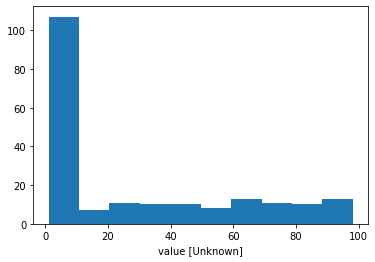

In [14]:
ds_read.value.plot()